<a href="https://colab.research.google.com/github/Skula33/FDSFE_SKulakowski/blob/main/movies_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import missingno as msno

In [4]:
movies_df = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/blob/main/data/movies_metadata_kaggle.csv?raw=true", compression = 'zip')

In [6]:
movies_df.shape

(45454, 25)

In [7]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,earnings
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,inf


In [10]:
columns = movies_df.columns

In [9]:
movies_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45454.0,4.225399e+06,1.742576e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
id,45454.0,1.083484e+05,1.124460e+05,2.0,26447.500000,60004.000000,157304.000000,4.691720e+05
popularity,45451.0,2.921765e+00,6.005910e+00,0.0,0.385945,1.127613,3.679334,5.474883e+02
revenue,45451.0,1.121157e+07,6.433842e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
vote_average,45451.0,5.618543e+00,1.924085e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45451.0,1.099175e+02,4.913569e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
earnings,10916.0,inf,NaN,0.0,0.000000,1.273533,7.267308,inf


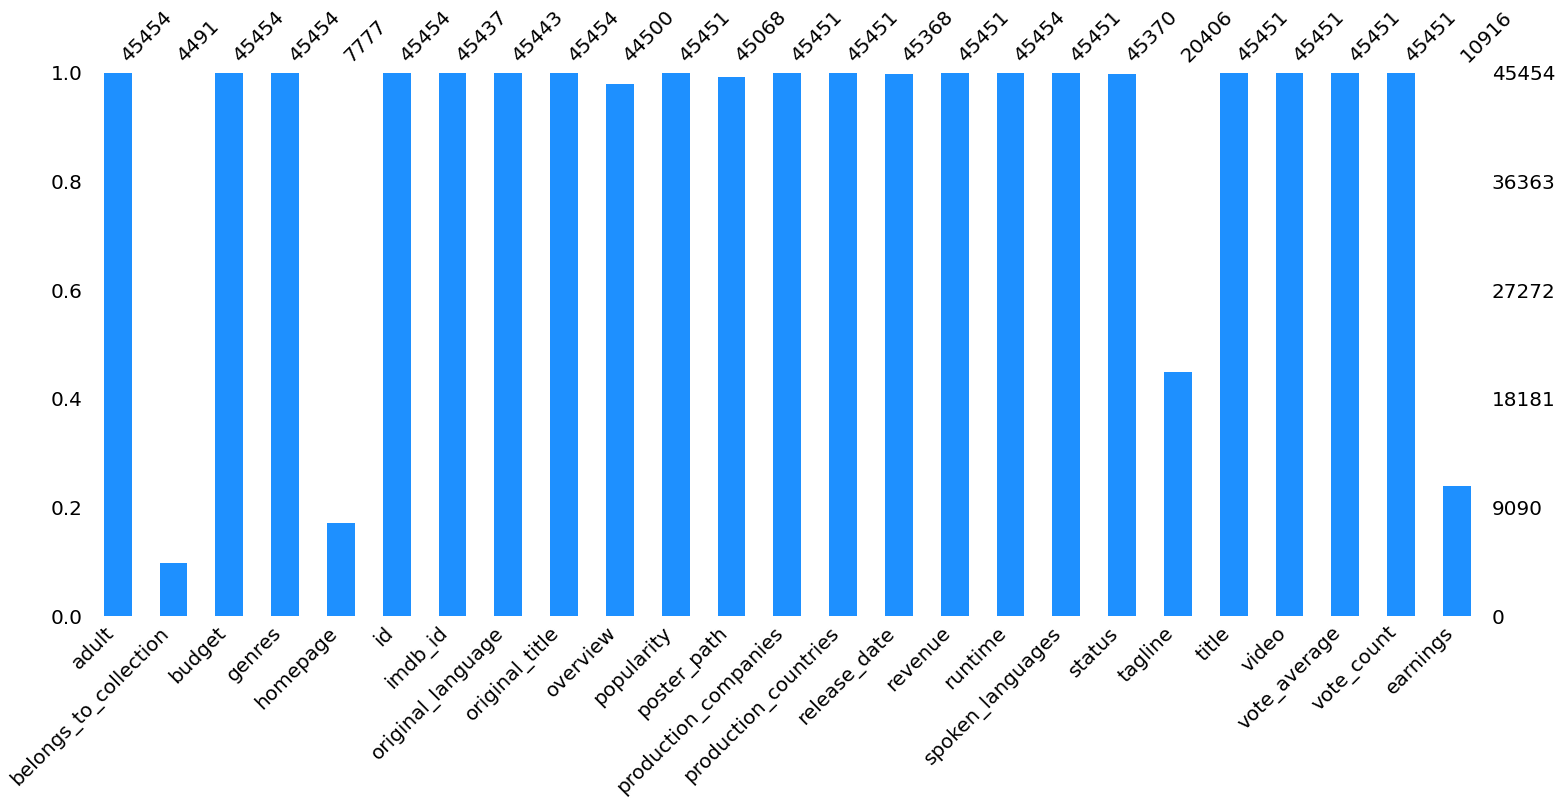

In [15]:
initial_size = movies_df.shape[0]
msno.bar(movies_df, color = 'dodgerblue', fontsize = 20);

In [17]:
movies_df.drop(['belongs_to_collection', 'homepage', 'tagline'], axis = 1, inplace = True)

In [18]:
movies_df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'earnings'],
      dtype='object')

In [19]:
movies_df.isnull().sum()

adult                       0
budget                      0
genres                      0
id                          0
imdb_id                    17
original_language          11
original_title              0
overview                  954
popularity                  3
poster_path               386
production_companies        3
production_countries        3
release_date               86
revenue                     3
runtime                     0
spoken_languages            3
status                     84
title                       3
video                       3
vote_average                3
vote_count                  3
earnings                34538
dtype: int64

In [21]:
movies_df.dropna(subset = ['popularity'], inplace = True)

In [23]:
movies_df[movies_df['popularity'] == movies_df['popularity'].max()]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,earnings
30696,False,74000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",211672,tt2293640,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,/q0R4crx2SehcEEQEkYObktdeFy.jpg,...,2015-06-17,1.156731e+09,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Minions,False,6.4,4729.0,15.631499
